## Challenge: Vorhersage von Immobilienpreisen

## 1. Problemstellung

Eine Investmentgesellschaft will seine internen Review- und Investment-Prozesse besser automatisieren.

Teil des Portfolios der Investementgesellschaft sind Immobilienbestände im Gebiet um Ames, Iowa, USA. Über den Zustand und die Austattung dieser Immobilien wird selbstverständlich Buch geführt. Neben Wohnfläche, Baujahr, Zustand und Anzahl der Zimmer sind diverse andere Informationen vorhanden, so zum Beispiel die Form des Grundstücks, der Belag der Einfahrt, das Material der Außenwände und so weiter. Insgesamt sind für jede Immobilie in etwa ~80 Messgrößen und Eckdaten bekannt.

Die Investmentgesellschaft hat ein Interesse daran, den Wert dieser Immobilien möglichst genau zu schätzen. Üblicherweise würde der Wert jeder Immobilie von Experten geschätzt. In einzelnen Fällen wäre dafür sogar eine Begutachtung des Objeckt nötig. Der Prozess, den Wert von fast 3000 Immobilien im Portfolio der Investmentgesellschaft zu schätzen ist langwierig, fehleranfällig und teuer.

Deshalb ist die Investmentgesellschaft auf Sie zugekommen, um feststellen, ob es möglich ist, die Prozesse zu automatisieren, möglicherweise sogar durch *Machine Learning*.

Der Kunde hat deshalb eine Beispielaufgabe für Sie vorbereitet, um das Potential von Methoden des *Machine Learning* für die Problemstellung einzuschätzen.

Ihnen wir zunächst ein folgender Datensatz zur Verfügung gestellt:

![Test Data](https://raw.githubusercontent.com/layerwise/training/main/assets/house_prices_test_example_image.png)

Dabei handelt es sich um eine Liste von Immobilien im Bestand des Kunden, jede mit einer eindeutigen Identifikationsnummer, für die ein Verkaufspreis vorhergesagt werden soll. Für jede Immobilie sind diverse Messdaten und Informationen gegeben - insgesamt 80 solche Größen.

Der Kunde hat per Expertenmeinung bereits eine Schätzung für den Verkaufspreis jeder dieser Immobilien angestellt - doch diese wird Ihnen nicht mitgeteilt. Ihre Aufgabe ist es, für jede der Immobilien einen Verkaufspreis vorherzusagen und dabei möglichst genau die Einschätzung des Kunden zu treffen.

Das einzige, was Ihnen dafür zur Verfügung steht, ist ein weiterer Datensatz:

![Train Data](https://raw.githubusercontent.com/layerwise/training/main/assets/house_prices_test_example_image.png)


Dieser Datensatz ist sehr ähnlich dem ersten Datensatz. Er beschreibt eine andere Menge von Immobilien, die sich zuvor im Bestand des Kunden befunden haben und inzwischen verkauft wurden, für die die gleichen Messgrößen und Informationen vorliegen. Es gibt keine Überschneidung zwischen den zwei Datensätzen, d.h. jede Idenfikationsnummer in diesem zweiten Datensatz kommt nicht im ersten Datensatz vor und umgekehrt.

Für diesen zweiten Datensatz gibt es aber eine zusätzliche Information: hier wurde bereits der tatsächliche Verkaufspreis (*SalePrice*) in US-Dollar angegeben.

**Wie lassen sich die Informationen aus dem zweiten Datensatz nutzen, um für die Immobilien des Kunden den Verkaufspreis vorherzusagen?**

**Schreiben Sie ein Programm, das für jede Immobilie des Kunden ein Zahl ausgibt - Ihre Schätzung für den Verkaufspreis in US-Dollar.**

## 2. Daten

### 2.1. Daten laden

Zuallerst müssen Sie die Daten für die folgende Aufgabe finden und herunterladen. Es handelt sich dabei um den Datensatz *Ames House Prices* der in der Lektion als zip-Archiv heruntergeladen werden kann. Nach dem Entpacken befinden sich im Ordner folgende Dateien:

- `AmesIowaHousingData.csv`
- `AmesIowaHousingData_new.csv`
- `AmesIowaHousingDataDocumentation.txt`

Beschäftigen Sie sich mit den Dateien. Zur Erklärung: die Datei `AmesIowaHousingData.csv` ist diejenige, die die Investmentgesellschaft Ihnen zum Trainieren Ihres Modells zur Verfügung gestellt hat. Die Datei `AmesIowaHousingData_new.csv` ist die Datei, auf der Sie eine Vorhersage anstellen sollen (die Investmentgesellschaft hat hier die tatsächlichen Preise der Immobilien gelöscht).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("../data/house_prices/AmesIowaHousingData.csv")

# zuallererst: Trainings- und Testdaten - im Idealfall sollten die Testdaten bis zum fertigen Modell
# nicht einmal angeschaut werden
df_train, df_test = train_test_split(df, train_size=0.8)

### 2.2 Daten sichten

In [3]:
df_train.head()

,id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1345,48228,923202134,20,RL,70.0,8402,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,147000
902,71905,902427045,20,RM,70.0,12702,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,97000
2003,70684,907181090,60,RL,68.0,9272,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,196000
916,93534,526354070,60,RL,85.0,11075,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,206900
1757,13684,527214050,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837


In [4]:
df_train.describe()

,id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,1875.000000,1.875000e+03,1875.000000,1570.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1857.000000,...,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.000000,1875.00000,1875.000000
mean,54934.684267,7.125004e+08,57.960000,69.028025,9863.519467,6.132267,5.563733,1971.800000,1984.811200,100.583199,...,93.392000,48.125867,22.274667,2.674667,15.907733,2.128000,45.617067,6.210667,2007.79520,181201.267733
std,26012.490276,1.886653e+08,43.251776,22.400986,6115.450951,1.391620,1.111484,30.292033,20.892355,175.354379,...,123.916036,67.910514,64.820438,25.604532,55.075068,34.605871,473.602435,2.727365,1.32325,79904.751226
min,10024.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.00000,12789.000000
25%,32018.000000,5.284770e+08,20.000000,59.000000,7395.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.00000,129900.000000
50%,54865.000000,5.354511e+08,50.000000,68.000000,9353.000000,6.000000,5.000000,1974.000000,1994.000000,0.000000,...,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.00000,160200.000000
75%,77245.500000,9.071780e+08,70.000000,80.000000,11422.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.00000,213875.000000
max,99915.000000,1.007100e+09,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,480.000000,800.000000,15500.000000,12.000000,2010.00000,755000.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1875 entries, 1345 to 730
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1875 non-null   int64  
 1   PID              1875 non-null   int64  
 2   MS SubClass      1875 non-null   int64  
 3   MS Zoning        1875 non-null   object 
 4   Lot Frontage     1570 non-null   float64
 5   Lot Area         1875 non-null   int64  
 6   Street           1875 non-null   object 
 7   Alley            126 non-null    object 
 8   Lot Shape        1875 non-null   object 
 9   Land Contour     1875 non-null   object 
 10  Utilities        1875 non-null   object 
 11  Lot Config       1875 non-null   object 
 12  Land Slope       1875 non-null   object 
 13  Neighborhood     1875 non-null   object 
 14  Condition 1      1875 non-null   object 
 15  Condition 2      1875 non-null   object 
 16  Bldg Type        1875 non-null   object 
 17  House Style 

In [6]:
df_train.columns

Index(['id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

#### 2.2.1 Zielvariable

Zunächst die Zielvariable - `SalePrice`. Hiermit kann die Verteilung der Zielvariablen eingeschätzt werden. Oft sind Transformationen der Zielvariablen sinnvoll, z.B. logarithmische Transformationen oder Transformationen hin zu einer stärker normalverteilten Zielvariablen. Dies ist auch hier eine Möglichkeit, aber wir fassen dieses Thema dennoch als weiterführend auf und überspringen es.

In [7]:
df_train['SalePrice'].describe()

count      1875.000000
mean     181201.267733
std       79904.751226
min       12789.000000
25%      129900.000000
50%      160200.000000
75%      213875.000000
max      755000.000000
Name: SalePrice, dtype: float64

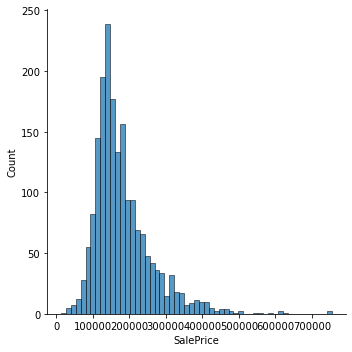

In [8]:
sns.displot(df_train['SalePrice'])

#### 2.2.2 Korrelationen der Features mit der Zielvariablen

**Numerische Features**

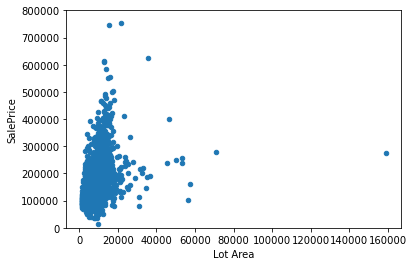

In [9]:
example_numerical_feature = 'Lot Area'
df_train.plot(x=example_numerical_feature, y='SalePrice', kind="scatter", ylim=(0,800000));

**Kategorische Features**

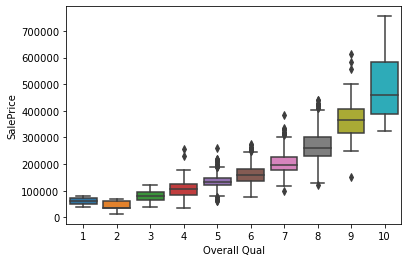

In [10]:
#box plot overallqual/saleprice
example_categorical_feature = 'Overall Qual'

sns.boxplot(x=example_categorical_feature, y="SalePrice", data=df_train);

**Korrelationsmatrix**

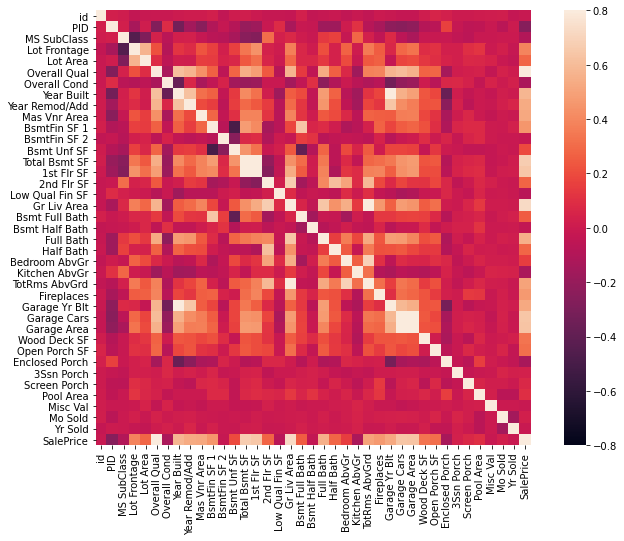

In [11]:
corrmat = df_train.corr()

fig = plt.figure(figsize=(12, 8))
sns.heatmap(corrmat, vmax=0.8, vmin=-0.8, square=True);

**Reduzierte Korrelationsmatrix**

Eine Korrelationsmatrix *kann* zur Selektion von Features verwendet werden. Dies ist nur eine von vielen Möglichkeiten und hat viele Limitationen. So werden durch eine Korrelationsmatrix nur lineare Korrelationen abgebildet. Nicht-lineare Modelle (z.B. RandomForests) können eventuell auch nicht-lineare Zusammenhänge entdecken und werden durch eine Selektion der Features eher eingeschränkt.

In [12]:
# Schnelle Auswahl der k Features mit der stärksten Korrelation
k = 10
k_best_features = corrmat["SalePrice"].abs().nlargest(k)
k_best_features

SalePrice         1.000000
Overall Qual      0.803376
Gr Liv Area       0.726729
Total Bsmt SF     0.669461
1st Flr SF        0.645526
Garage Cars       0.643318
Garage Area       0.634290
Year Built        0.578270
Full Bath         0.554820
Year Remod/Add    0.531955
Name: SalePrice, dtype: float64

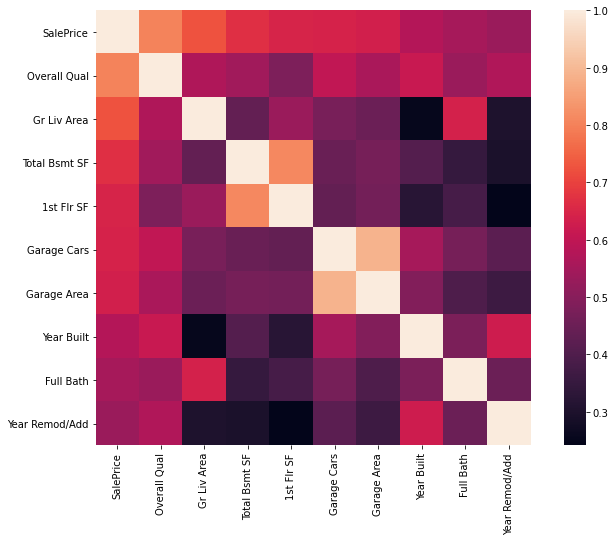

In [13]:
corrmat_k_best = df_train[k_best_features.index].corr()

fig = plt.figure(figsize=(12, 8))
sns.heatmap(corrmat_k_best, square=True);

**Scatterplot Matrix**

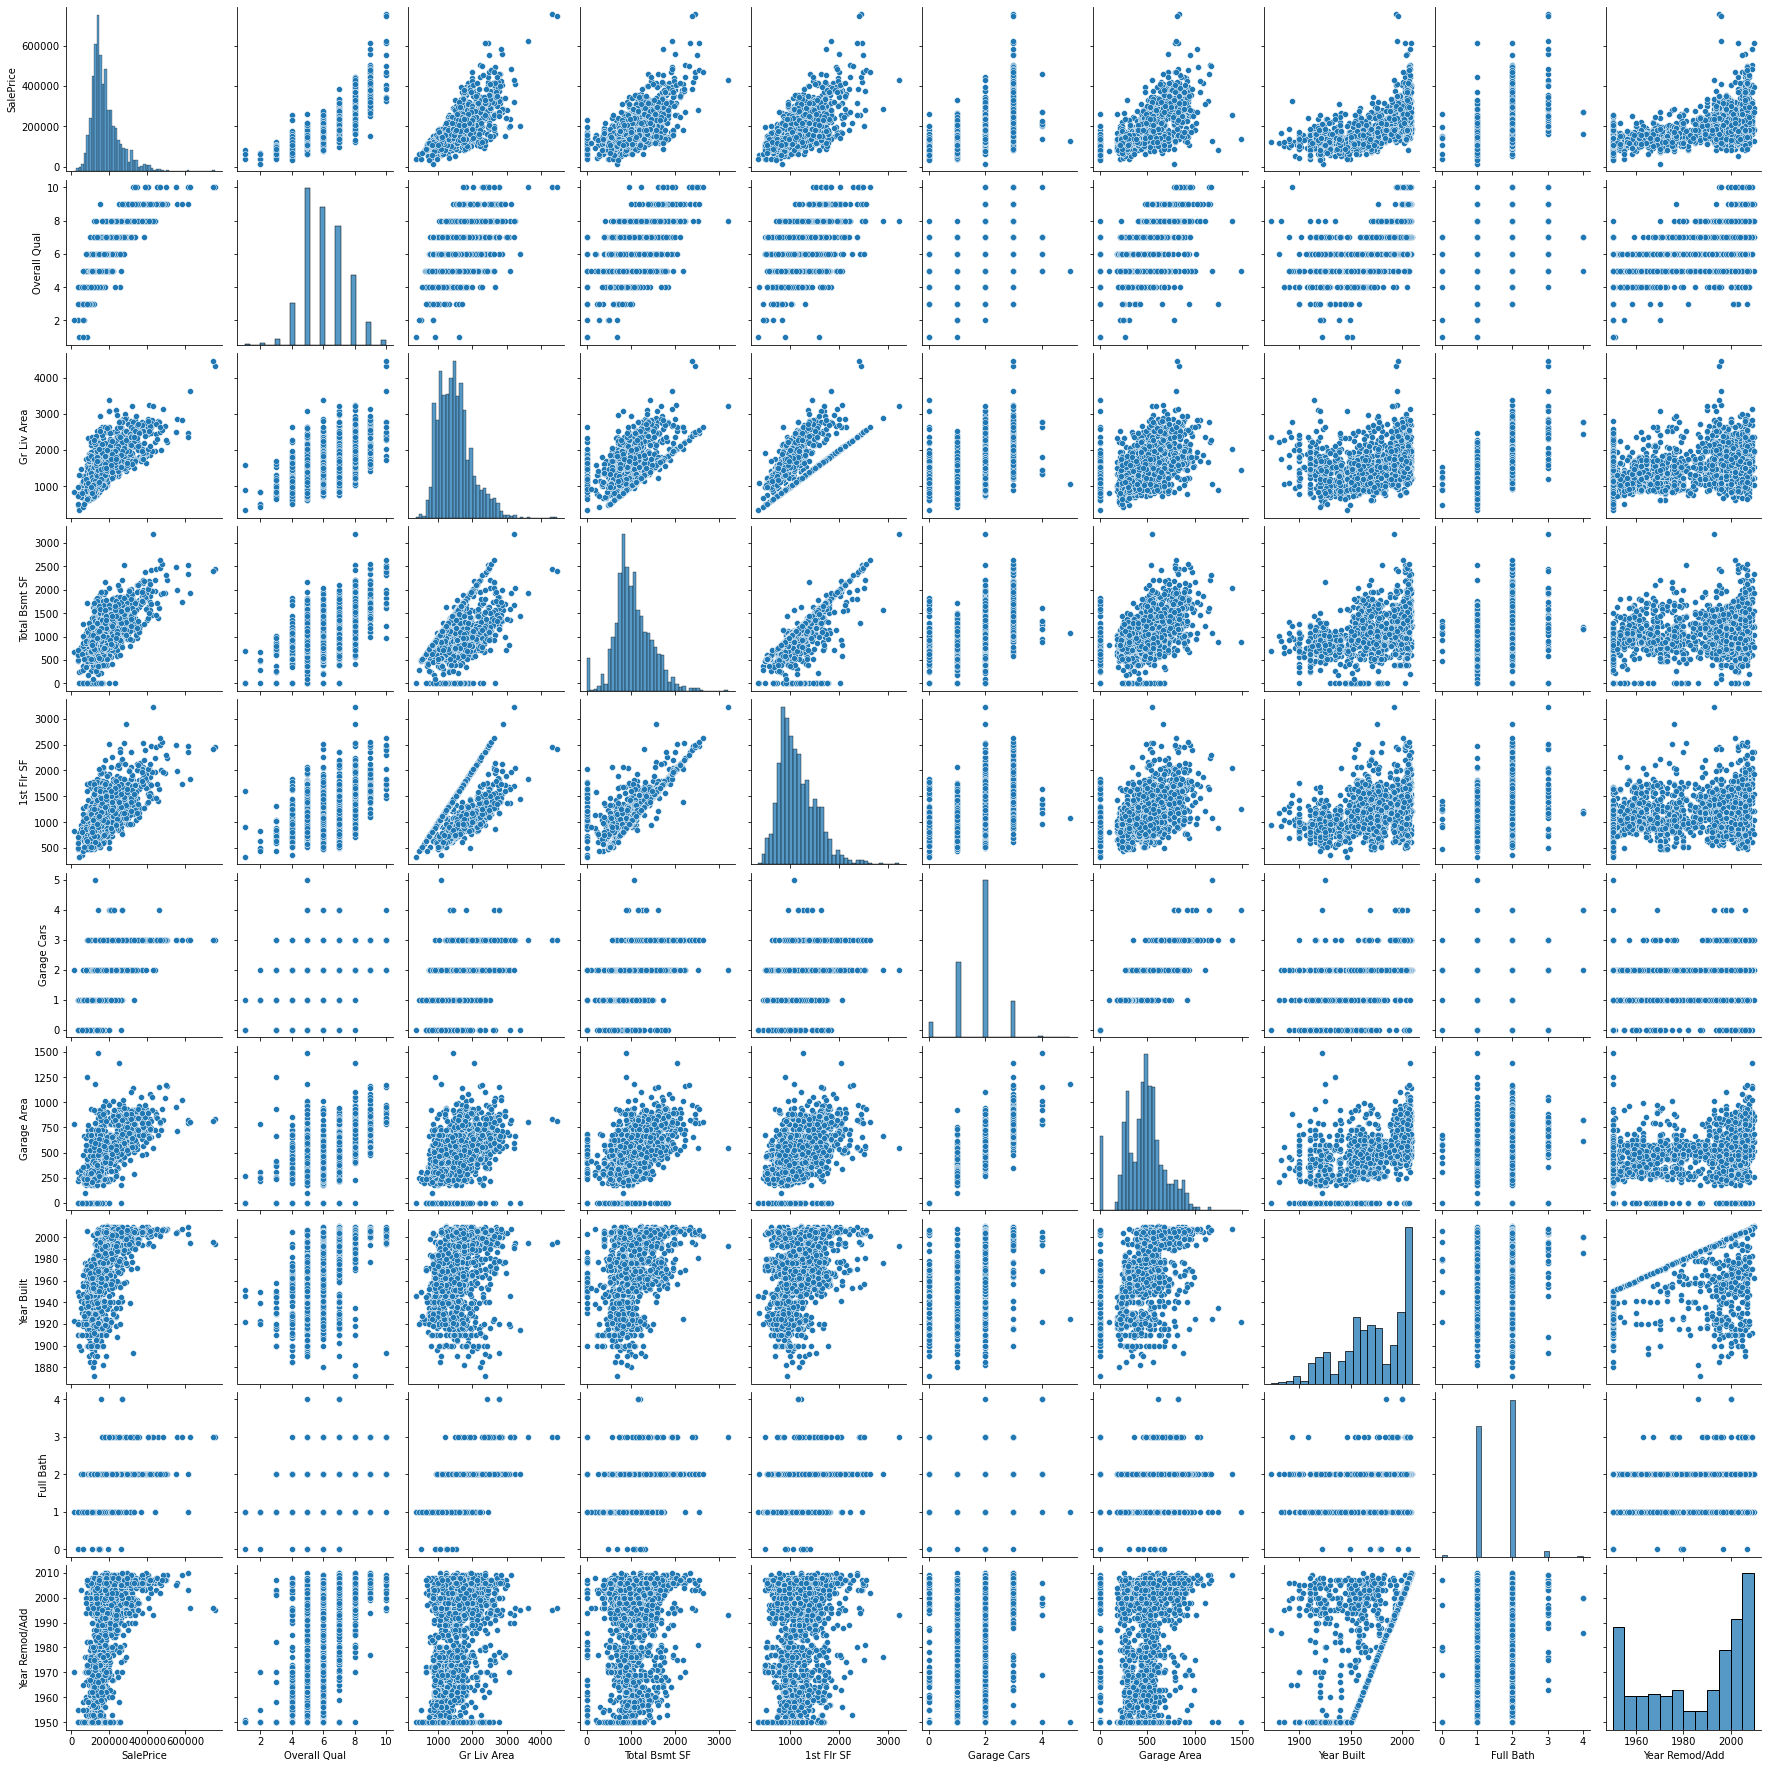

In [14]:
# Scatterplot-Matrix für eine Auswahl der Features
# Achtung: lange Laufzeit
sns.pairplot(df_train[k_best_features.index])
plt.show();

#### 2.2.3. Missing Values

Anhand der Trainingsdaten sollte sich ein Überblick über die fehlenden Werte verschafft werden.

In [22]:
missing_count = df_train.isnull().sum().sort_values(ascending=False)
missing_percentage = missing_count / len(df_train)

missing_data = pd.concat([missing_count, missing_percentage], axis=1, keys=['count', 'percent'])
missing_data.head(20)

,count,percent
Pool QC,1869,0.996800
Misc Feature,1814,0.967467
Alley,1759,0.938133
Fence,1506,0.803200
Fireplace Qu,916,0.488533
Lot Frontage,317,0.169067
Garage Qual,110,0.058667
Garage Yr Blt,110,0.058667
Garage Cond,110,0.058667
Garage Finish,110,0.058667


#### 2.2.4. Kategorische Features

In [23]:
df_train.select_dtypes(include="object").head(10)

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
2050,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NPkVill,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1296,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
803,RM,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Mitchel,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2136,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
526,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,...,Detchd,Unf,TA,TA,Y,NaN,GdWo,NaN,WD,Normal
448,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,COD,Abnorml
1048,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,...,Detchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2011,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1920,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
316,C (all),Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml


In [24]:
df_train_categorical = df_train.select_dtypes(include="object").astype("category")

for column in df_train_categorical.columns:
    print(df_train_categorical[column].cat.categories)

Index(['A (agr)', 'C (all)', 'FV', 'I (all)', 'RH', 'RL', 'RM'], dtype='object')
Index(['Grvl', 'Pave'], dtype='object')
Index(['Grvl', 'Pave'], dtype='object')
Index(['IR1', 'IR2', 'IR3', 'Reg'], dtype='object')
Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object')
Index(['AllPub', 'NoSewr'], dtype='object')
Index(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype='object')
Index(['Gtl', 'Mod', 'Sev'], dtype='object')
Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'Greens', 'IDOTRR', 'MeadowV',
       'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt',
       'OldTown', 'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'],
      dtype='object')
Index(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
       'RRNn'],
      dtype='object')
Index(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRNn'], dtype='object')
Index(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'Twn

#### 2.2.5. Numerische Features

Um einzuschätzen, ob und welche Skalierung der numerischen Features notwendig ist, kann der folgende Plot helfen.

<AxesSubplot:>

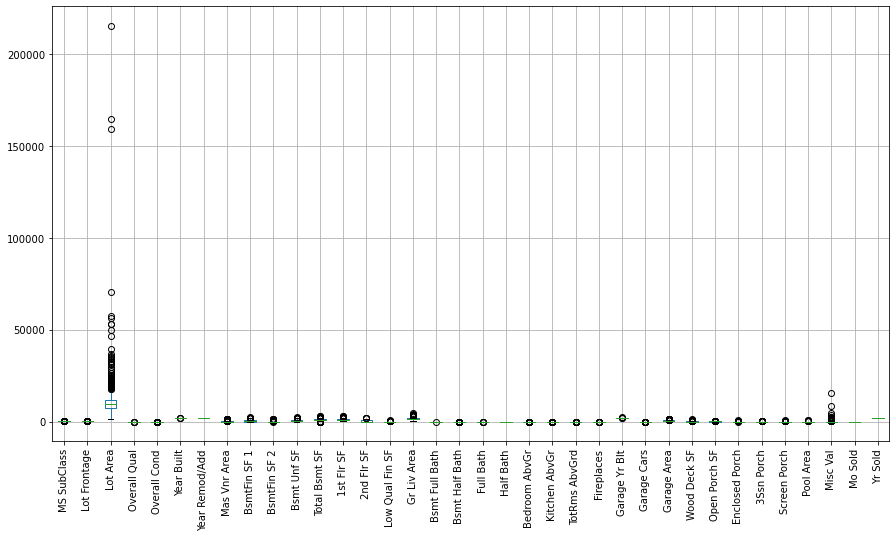

In [25]:
df_train_numeric = df_train.drop(columns=["id", "PID", "SalePrice"]).select_dtypes(include="number")

plt.figure(figsize=(15, 8))
df_train_numeric.boxplot(rot=90)

## 3. Das Machine Learning Modell

In [41]:
from sklearn.compose import make_column_selector


nominal_columns = ["Street", "Lot Config"]
# Nominale Kategorien können aus den Daten geschlossen werden
nominal_categories = [list(df[column].unique()) for column in nominal_columns]


ordinal_columns = ["Lot Shape", "Land Slope"]
# Ordinale Kategorien sollten manuell sortiert werden
ordinal_categories = [
    ["Reg", "IR1", "IR2", "IR3"],
    ["Gtl", "Mod", "Sev"]    
]

numeric_selector = make_column_selector(dtype_include=np.number)
numeric_columns = numeric_selector(df_train.drop(columns=["id", "PID", "SalePrice"]))

In [42]:
X_train = df_train.loc[:, nominal_columns + ordinal_columns + numeric_columns]
y_train = df_train.loc[:, "SalePrice"]

### 3.1. Fehlende Werte ersetzen

In [43]:
# Scikit-Learn Imputation
from sklearn.impute import SimpleImputer

# Imputations-Transformationen instanziieren und fitten
ordinal_imputer = SimpleImputer(strategy="most_frequent")
nominal_imputer = SimpleImputer(strategy="most_frequent")
numeric_imputer = SimpleImputer(strategy="median")

ordinal_imputer.fit(X_train.loc[:, ordinal_columns])
nominal_imputer.fit(X_train.loc[:, nominal_columns])
numeric_imputer.fit(X_train.loc[:, numeric_columns])

# Trainingsdaten transformieren
X_train.loc[:, ordinal_columns] = ordinal_imputer.transform(X_train.loc[:, ordinal_columns])
X_train.loc[:, nominal_columns] = nominal_imputer.transform(X_train.loc[:, nominal_columns])
X_train.loc[:, numeric_columns] = numeric_imputer.transform(X_train.loc[:, numeric_columns])

In [44]:
X_train

,Street,Lot Config,Lot Shape,Land Slope,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
1172,Pave,Inside,Reg,Gtl,60.0,104.0,13518.0,9.0,5.0,2008.0,...,820.0,144.0,78.0,0.0,0.0,0.0,0.0,0.0,7.0,2009.0
1642,Pave,Inside,Reg,Gtl,70.0,54.0,9399.0,7.0,8.0,1919.0,...,288.0,0.0,0.0,212.0,0.0,0.0,0.0,0.0,9.0,2006.0
2,Pave,Inside,Reg,Gtl,60.0,68.0,11050.0,9.0,5.0,2000.0,...,736.0,253.0,142.0,0.0,0.0,0.0,0.0,0.0,5.0,2009.0
1488,Pave,Inside,Reg,Gtl,30.0,40.0,4280.0,5.0,6.0,1913.0,...,352.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,3.0,2007.0
1153,Pave,Inside,IR1,Gtl,20.0,68.0,7390.0,5.0,7.0,1955.0,...,260.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,Pave,Corner,Reg,Sev,30.0,60.0,5400.0,5.0,6.0,1921.0,...,326.0,0.0,0.0,112.0,0.0,0.0,0.0,0.0,12.0,2006.0
384,Pave,Inside,Reg,Gtl,20.0,60.0,7200.0,4.0,5.0,1950.0,...,420.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,7.0,2006.0
1089,Pave,Corner,IR1,Gtl,120.0,68.0,6820.0,8.0,5.0,1985.0,...,528.0,0.0,54.0,0.0,0.0,140.0,0.0,0.0,6.0,2010.0
742,Pave,Inside,Reg,Gtl,190.0,60.0,6780.0,6.0,8.0,1935.0,...,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0


In [45]:
# Fehlende Werte überprüfen
missing_count = X_train.isnull().sum().sort_values(ascending=False)
missing_percentage = missing_count / len(X_train)

missing_data = pd.concat([missing_count, missing_percentage], axis=1, keys=['count', 'percent'])
missing_data.head(20)

,count,percent
Yr Sold,0,0.0
Mo Sold,0,0.0
2nd Flr SF,0,0.0
1st Flr SF,0,0.0
Total Bsmt SF,0,0.0
Bsmt Unf SF,0,0.0
BsmtFin SF 2,0,0.0
BsmtFin SF 1,0,0.0
Mas Vnr Area,0,0.0
Year Remod/Add,0,0.0


### 3.2 Encoding: Ordinale und Nominale Features

In [46]:
# Scikit-Learn Feature Encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


# Encoding-Transformationen instanziieren und fitten
ordinal_encoder = OrdinalEncoder(categories=ordinal_categories)
nominal_encoder = OneHotEncoder(categories=nominal_categories, sparse=False)

ordinal_encoder.fit(X_train.loc[:, ordinal_columns])
nominal_encoder.fit(X_train.loc[:, nominal_columns])


# Trainingsdaten transformieren
X_train.loc[:, ordinal_columns] = ordinal_encoder.transform(X_train[ordinal_columns])

X_train_nominal = nominal_encoder.transform(X_train.loc[:, nominal_columns])
X_train_nominal = pd.DataFrame(
    X_train_nominal,
    columns=nominal_encoder.get_feature_names(),
    index=X_train.index
)

X_train= pd.concat((
    X_train_nominal,
    X_train.drop(columns=nominal_columns)
), axis=1)

X_train

,x0_Pave,x0_Grvl,x1_Inside,x1_CulDSac,x1_Corner,x1_FR2,x1_FR3,Lot Shape,Land Slope,MS SubClass,...,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold
1172,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,...,820.0,144.0,78.0,0.0,0.0,0.0,0.0,0.0,7.0,2009.0
1642,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,...,288.0,0.0,0.0,212.0,0.0,0.0,0.0,0.0,9.0,2006.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,...,736.0,253.0,142.0,0.0,0.0,0.0,0.0,0.0,5.0,2009.0
1488,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,...,352.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,3.0,2007.0
1153,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20.0,...,260.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,30.0,...,326.0,0.0,0.0,112.0,0.0,0.0,0.0,0.0,12.0,2006.0
384,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,...,420.0,0.0,29.0,0.0,0.0,0.0,0.0,0.0,7.0,2006.0
1089,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,120.0,...,528.0,0.0,54.0,0.0,0.0,140.0,0.0,0.0,6.0,2010.0
742,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,190.0,...,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0


### 3.3. Numerische Features skalieren

In [62]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# Feature Scaling instanziieren und fitten
scaler = MinMaxScaler()
scaler.fit(X_train[numeric_columns])

X_train.loc[:, numeric_columns] = scaler.transform(X_train[numeric_columns])

<AxesSubplot:>

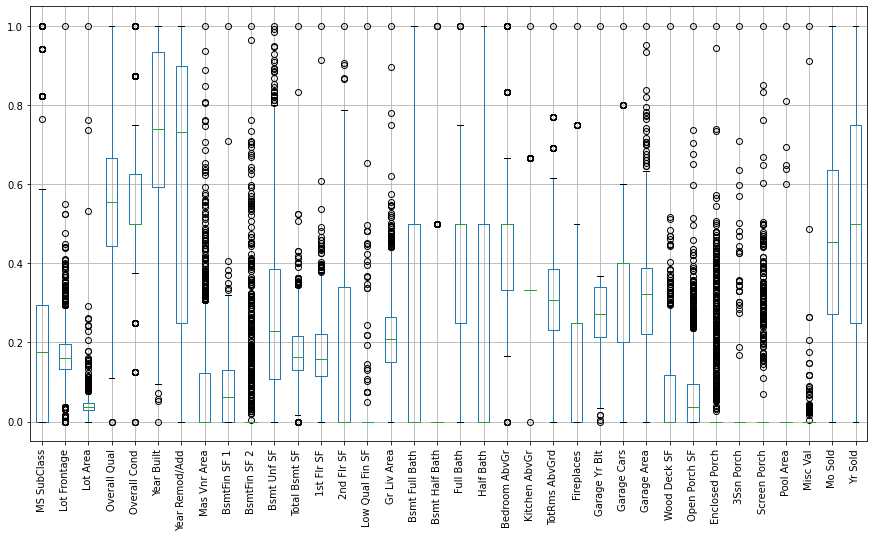

In [63]:
# Skalierung überprüfen
plt.figure(figsize=(15, 8))
X_train[numeric_columns].boxplot(rot=90)

### 3.4. Modell trainieren

In [64]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=500)

random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [65]:
random_forest.score(X_train, y_train)

0.9850177031395384

### 3.5. Scikit-Learn Pipeline

#### 3.5.1. Preprocessing Pipeline

In [71]:
# Die Preprocessing Pipeline kann durch Scikit-Learn kompakt und übersichtlich erstellt werden

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

ordinal_preprocessing = make_pipeline(
    ordinal_imputer,
    ordinal_encoder
)

nominal_preprocessing = make_pipeline(
    nominal_imputer,
    nominal_encoder
)

numeric_preprocessing = make_pipeline(
    numeric_imputer,
    scaler
)

preprocessor = ColumnTransformer([
    ("ordinal_preprocessor", ordinal_preprocessing, ordinal_columns),
    ("nominal_preprocessor", nominal_preprocessing, nominal_columns),
    ("numeric_preprocessor", numeric_preprocessing, numeric_columns),
    ],
    remainder="drop"
)

In [73]:
# Der folgende Befehl führt alle Fits aus
preprocessor.fit(df_train)

ColumnTransformer(transformers=[('ordinal_preprocessor',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Reg',
                                                                              'IR1',
                                                                              'IR2',
                                                                              'IR3'],
                                                                             ['Gtl',
                                                                              'Mod',
                                                                              'Sev']]))]),
                                 ['Lot Shape', 'Land Slope']),
                                ('nominal_preproces

In [74]:
# Um die Daten nun vorzuverarbeiten, ist nur der folgende Befehl nötig
X_train_preprocessed = preprocessor.transform(df_train)
X_train_preprocessed

#### 3.5.2 Preprocessing + Model Pipeline

In [79]:
# Mit einer weiteren Pipeline lässt sich das gesamte Modell (Preprocessing + Estimator)
# erstellen
random_forest_and_preprocessor = make_pipeline(
    preprocessor,
    random_forest
)

In [84]:
random_forest_and_preprocessor.fit(df_train.drop(columns=["SalePrice"]), df_train["SalePrice"])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinal_preprocessor',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Reg',
                                                                                               'IR1',
                                                                                               'IR2',
                                                                                               'IR3'],
                                                                                              ['Gtl',
                                                                                               'Mod

## 4. Evaluation


In [90]:
y_pred_test = random_forest_and_preprocessor.predict(df_test.drop(columns=["SalePrice"]))

In [91]:
random_forest_and_preprocessor.score(df_test.drop(columns=["SalePrice"]), df_test["SalePrice"])

0.9071218204968823

## 5. Vorhersage auf neuen Daten

In [92]:
df_new = pd.read_csv("../data/house_prices/AmesIowaHousingData_new.csv")

y_new = random_forest_and_preprocessor.predict(df_new)

In [88]:
y_new

array([ 87112.004     , 226429.594     , 133257.44      , 162483.        ,
        83927.2       , 205194.436     , 190254.32      , 247674.17      ,
       295090.368     , 169656.76      , 143919.266     , 139958.016     ,
       161758.9       , 150129.29      , 193691.852     , 148891.804     ,
       135186.318     , 227191.618     , 124598.294     , 224601.762     ,
       115500.922     , 121570.22      ,  81851.612     , 183125.6       ,
       144606.262     , 179343.166     , 153253.75666667, 140798.886     ,
       158401.59      , 116247.024     , 120313.372     , 165876.15      ,
       176807.98      ,  96389.022     , 114744.496     , 141809.1       ,
       147165.63      , 144960.618     , 129004.6       , 200845.116     ,
       133531.034     , 175719.654     , 310121.976     , 312477.48      ,
       440195.368     , 153508.85      , 167801.57666667, 100851.748     ,
       177724.832     , 186285.664     , 161358.278     ,  76499.91      ,
       196556.366     , 1